In [1]:
pip install pandas matplotlib statsmodels


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("airline_passengers.csv")
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df.rename(columns={'Thousands of Passengers': 'Passengers'}, inplace=True)

In [7]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


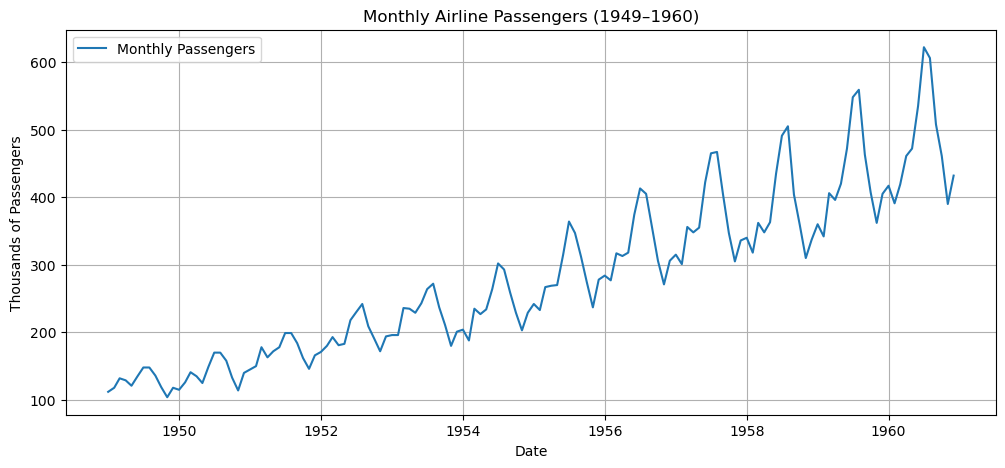

In [9]:
plt.figure(figsize=(12, 5))
plt.plot(df['Passengers'], label='Monthly Passengers')
plt.title("Monthly Airline Passengers (1949–1960)")
plt.xlabel("Date")
plt.ylabel("Thousands of Passengers")
plt.grid(True)
plt.legend()
plt.show()

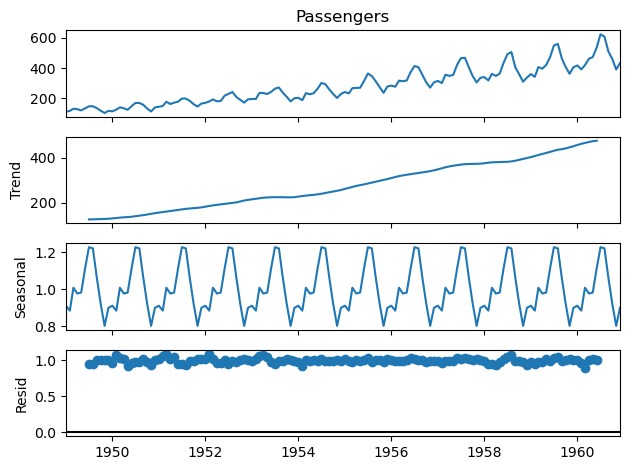

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df['Passengers'], model='multiplicative')
decomp.plot()
plt.tight_layout()
plt.show()


In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA(p,d,q)(P,D,Q,s)
# We'll use (2,1,2)(1,1,1,12) as an example (s=12 for monthly seasonality)
sarima_model = SARIMAX(df['Passengers'],
                       order=(2, 1, 2),
                       seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [15]:
# Forecast next 12 months
forecast_sarima = sarima_result.forecast(steps=12)
forecast_sarima.index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')


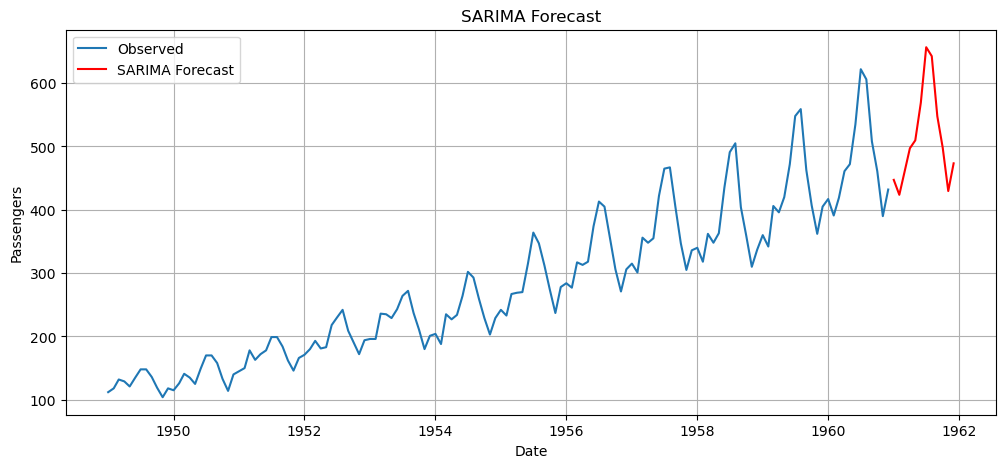

In [17]:
# Plot
plt.figure(figsize=(12, 5))
plt.plot(df, label='Observed')
plt.plot(forecast_sarima, label='SARIMA Forecast', color='red')
plt.title("SARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.grid(True)
plt.show()


In [53]:
# for sarimax im using starbucks data

In [ ]:
#We used the Starbucks dataset for SARIMAX because it contains both a time-dependent target variable and a relevant external (exogenous) variable.
#Specifically, the 'Close' column represents the stock's closing price over time, which we aim to forecast.
#The 'Volume' column, which records the number of shares traded each day, serves as an external factor that can influence the stock price.
#SARIMAX is well-suited for such scenarios because, unlike SARIMA which only considers past values of the target series, SARIMAX allows us to include external variables that may impact the target.
#In this case, by including 'Volume' as an exogenous input, we can build a more informed and potentially more accurate forecasting model for the 'Close' price. 
#This makes the Starbucks dataset an appropriate choice for demonstrating SARIMAX in a real-world context.


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [33]:
df = pd.read_csv("starbucks.csv")
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

In [35]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [37]:
df = df.dropna()

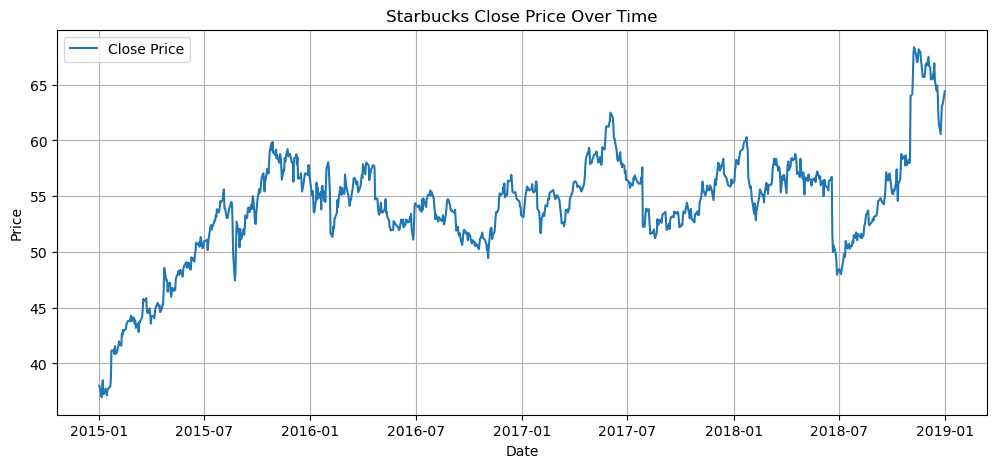

In [39]:
# Plot the data
plt.figure(figsize=(12, 5))
plt.plot(df['Close'], label='Close Price')
plt.title("Starbucks Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.show()

In [41]:
# Define target and exogenous variables
y = df['Close']
X = df[['Volume']]

# Fit SARIMAX model (example order)
model = SARIMAX(y, exog=X, order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit()

# Print summary
print(result.summary())


C:\Users\Vaishnavi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1006
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1204.000
Date:                            Wed, 21 May 2025   AIC                           2420.000
Time:                                    11:27:32   BIC                           2449.404
Sample:                                         0   HQIC                          2431.179
                                           - 1006                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume     -2.602e-08      3e-09     -8.670      0.000   -3.19e-08   -2.01e-08
ar.L1          0.2563      0.021   

In [43]:
import numpy as np

# Simulate next 30 days of volume (e.g., using average of last week)
future_volume = np.full(30, df['Volume'][-7:].mean())
future_volume = pd.DataFrame(future_volume, columns=['Volume'])


In [45]:
# Forecast
forecast = result.forecast(steps=30, exog=future_volume)

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [47]:
# Create future dates
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)


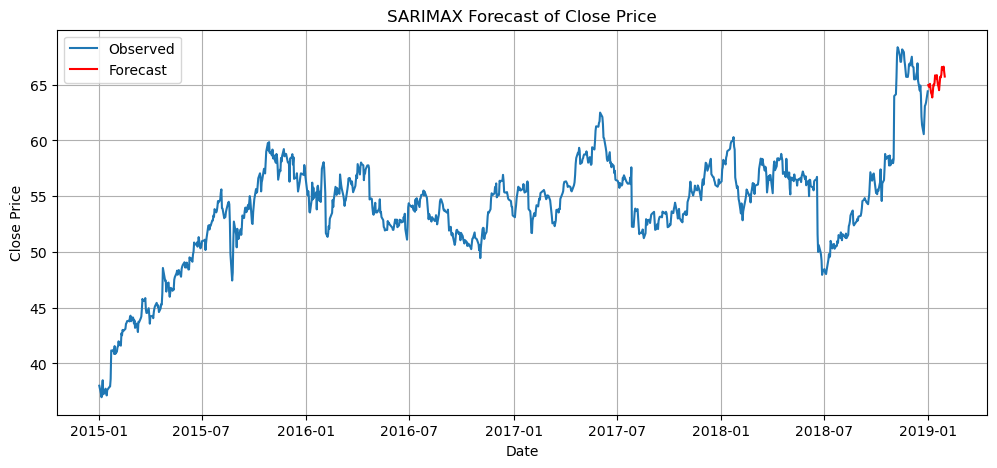

In [51]:
plt.figure(figsize=(12,5))
plt.plot(df['Close'], label='Observed')
plt.plot(future_dates, forecast, label='Forecast', color='red')
plt.title("SARIMAX Forecast of Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()